In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
package_version(CellTrek)

ERROR: Error: object 'CellTrek' not found


In [4]:
options(stringsAsFactors = F)
library(tidyverse)
# library(Seurat)
library(CellTrek)
library(viridis)
library(ConsensusClusterPlus)

ERROR: Error: package or namespace load failed for ‘CellTrek’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called ‘spatstat.univar’


In [74]:
c_data <- result@meta.data %>% select(c('perturb', 'perturb_gene', 'type', 'coord_x', 'coord_y'))
write.table(c_data, sep = '\t', file = '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.map.A.csv',quote = FALSE)

In [3]:
mt_genes <- readLines('/home/wpy/stereoseq/20240702-Exclusive/t_genes.txt')
head(mt_genes)

[1] "Gzma" "Gzmk" "Gzmh" "Cd8a" "Cd3d" "Cd7"

In [17]:
rownames(sc_matrix) <- rownames(sc_meta)

In [18]:
# data <- read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.combined.dedup.h5")
# data <- read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.reclustered.h5")
# sc_matrix <- read.table("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.reclustered.matrix.txt", sep="\t", header=T, row.names=1)
sc_meta <- read.table("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.reclustered.obs.csv", sep=",", header=T, row.names=1)
data <- CreateSeuratObject(counts=t(sc_matrix), meta.data=sc_meta)
print(str(data))

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:13530594] 2 4 24 28 33 45 58 59 64 65 ...
  .. .. .. .. .. ..@ p       : int [1:9888] 0 1070 2566 3783 5018 6494 8384 9568 10621 11819 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 12481 9887
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:12481] "Xkr4" "Sox17" "Lypla1" "Rgs20" ...
  .. .. .. .. .. .. ..$ : chr [1:9887] "AAACCTGAGAGACGAA-1" "AAACCTGAGCTTATCG-1" "AAACCTGAGTACTTGC-1" "AAACCTGAGTATCGAA-1" ...
  .. .. .. .. .. ..@ x       : num [1:13530594] 0.815 0.815 0.815 0.815 0.815 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:13530594] 2 4 24 28 33 45 58 59 64 6

In [19]:
cdata <- data

In [20]:
cdata <- FindVariableFeatures(cdata)

In [21]:
cdata$group <- cdata@meta.data$perturb_gene
Idents(cdata) <- 'group'

In [22]:
cv_genes <- mt_genes[mt_genes %in% rownames(cdata)]
# t_high_data <- subset(cdata, features = intersect(VariableFeatures(cdata), cv_genes))
t_high_data <- subset(cdata, features = cv_genes)

Loading required package: grid

Loading required package: futile.logger



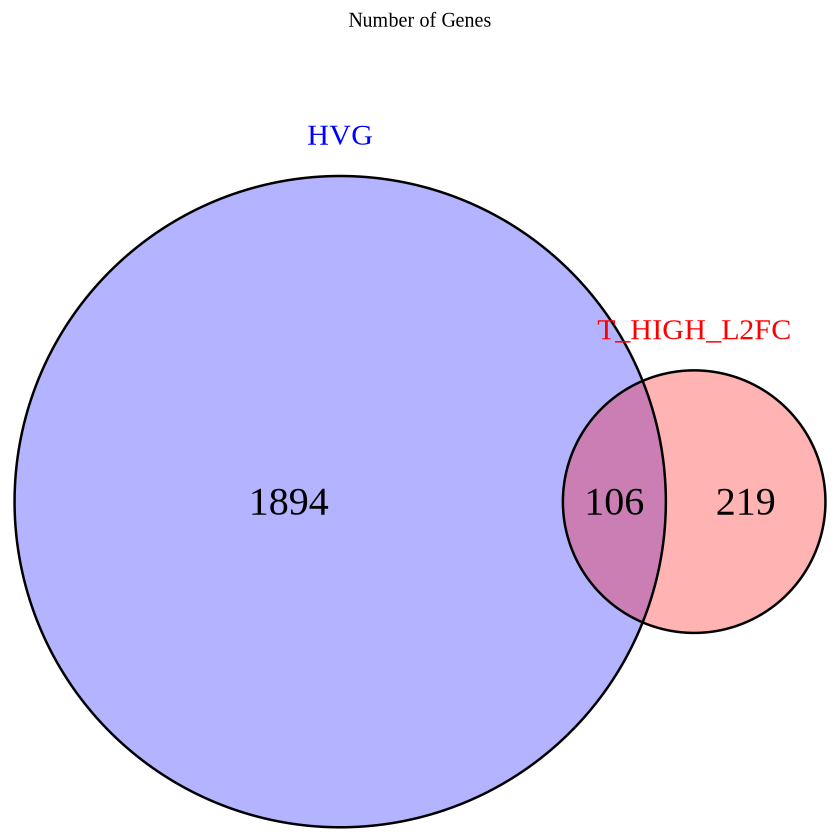

In [23]:
library(VennDiagram)

# 绘制维恩图
venn.plot <- venn.diagram(
  x = list(HVG = VariableFeatures(cdata), T_HIGH_L2FC = cv_genes),
  filename = NULL,
  fill = c("blue", "red"),
  alpha = 0.3,
  cat.col = c("blue", "red"),
  cat.cex = 1.5,
  cat.pos = 0,
  cex = 2,
  lwd = 2,
  main = "Number of Genes"
)
grid.draw(venn.plot)

In [24]:
t_high_data <- NormalizeData(t_high_data)
t_high_data <- ScaleData(t_high_data)

Centering and scaling data matrix



In [25]:
#t_high_data <- RunPCA(t_high_data, features=VariableFeatures(t_high_data))
t_high_data <- RunPCA(t_high_data)

PC_ 1 
Positive:  Tnfrsf4, Tnfrsf9, Cd8a, Ccr7, Cd70, Lag3, Il21r, Tnfsf4, Cd74, Il10ra 
	   Crtam, Vamp8, Pdcd1, Eomes, Cd160, Tnfrsf18, Tox, Il1r2, Il2ra, Prf1 
	   Cd5, Havcr2, Tnfsf9, Mpp7, Gpm6b, Itga4, Cd82, Tnfsf14, Rgs2, Hmmr 
Negative:  Gzma, Cxcr3, Gzmk, Itgb7, Ifngr1, Hcst, S1pr1, Anxa1, Pag1, Gpr183 
	   S100a6, Emb, Klf2, Itga1, Ccr2, Cd226, Il7r, Ifitm1, Itgb1, Rgs1 
	   Cxcr4, Pik3ip1, Cxcr6, Myadm, Ahnak, Lpar6, Crim1, Klrg1, Lef1, Cd40lg 
PC_ 2 
Positive:  Crtam, Il2ra, Ifitm2, Cd70, Tnfsf8, Gzma, Lta, Tnfsf9, Anxa1, Cd226 
	   Emb, Tnfsf14, Cd82, Bst2, Ifitm1, Ccr7, Itgb7, Cd69, Arl4d, Itgb1 
	   Klrg1, Il12rb2, Tcf7, Csf1, Pmepa1, Cxcr4, Myadm, Cxcr3, Il7r, Pag1 
Negative:  Tox, Pdcd1, Itga4, Prkch, Havcr2, Ifngr1, Lag3, Il10ra, Prf1, Cd8a 
	   Tnfrsf4, Vamp8, Ctla4, Ccr5, Fcer1g, Cd46, Klrd1, Trav19, Lef1, Hcst 
	   Ms4a1, Scn2a, Cd79a, Tenm1, Adgrv1, Cd7, S1pr5, Evi2b, Cxcl13, Aqp3 
PC_ 3 
Positive:  Tcf7, Crtam, Ccr7, Lrig1, Sell, Lta, Tnfsf8, Trat1, Slamf6, Tnfsf

In [26]:
t_high_data <- RunUMAP(t_high_data, reduction='pca', dims=1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:29:00 UMAP embedding parameters a = 0.9922 b = 1.112

14:29:00 Read 9887 rows and found 20 numeric columns

14:29:00 Using Annoy for neighbor search, n_neighbors = 30



14:29:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:29:01 Writing NN index file to temp file /tmp/RtmpYAfUCV/file470683a40a0a

14:29:01 Searching Annoy index using 1 thread, search_k = 3000

14:29:04 Annoy recall = 100%

14:29:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:29:05 Initializing from normalized Laplacian + noise (using irlba)

14:29:05 Commencing optimization for 500 epochs, with 406960 positive edges

14:29:32 Optimization finished



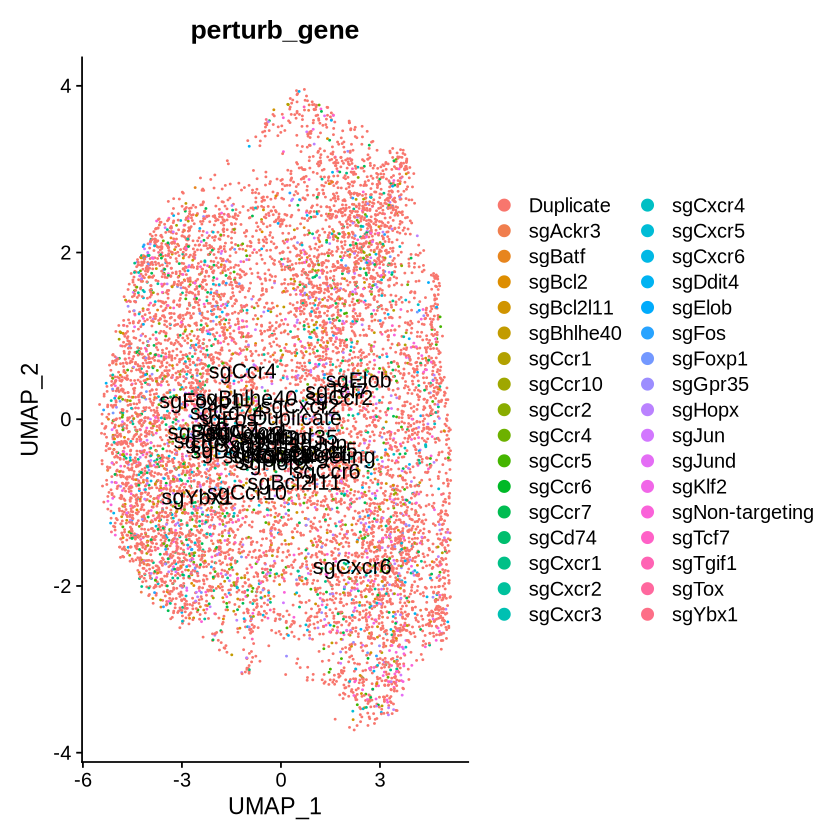

In [27]:
DimPlot(t_high_data, label=T, group.by="perturb_gene", label.size = 4.5)

In [31]:
# Try reading with anndata2ri instead since read_h5ad is failing
# library(anndata2ri)
# fdata <- anndata2ri::convertAnnDataToSCE("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.combined.clustered.h5")
# spatial_matrix <- read.table("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.reclustered.matrix.txt", sep="\t", header=T)
spatial_meta <- read.table("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.reclustered.obs.csv", sep=",", header=T)
rownames(spatial_matrix) <- rownames(spatial_meta)
spatial_data <- CreateSeuratObject(counts=t(spatial_matrix), meta.data=spatial_meta)
print(str(spatial_data))

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1579986] 2 19 26 131 330 403 460 903 913 960 ...
  .. .. .. .. .. ..@ p       : int [1:3113] 0 811 985 1501 2228 2906 3711 4568 5150 5701 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 20857 3112
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:20857] "X0610005C13Rik" "X0610006L08Rik" "X0610009B22Rik" "X0610009O20Rik" ...
  .. .. .. .. .. .. ..$ : chr [1:3112] "1" "2" "3" "4" ...
  .. .. .. .. .. ..@ x       : num [1:1579986] 1 1 3 1 1 1 1 2 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1579986] 2 19 26 131 330 403 460 903 913 960 ...
  .. .. .. .. .. ..@ p     

In [32]:
spatial_coords <- read.table("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.reclustered.spatial.txt", sep="\t")

In [33]:
spatial_data@meta.data$coord_x <- spatial_coords[, 1]
spatial_data@meta.data$coord_y <- spatial_coords[, 2]

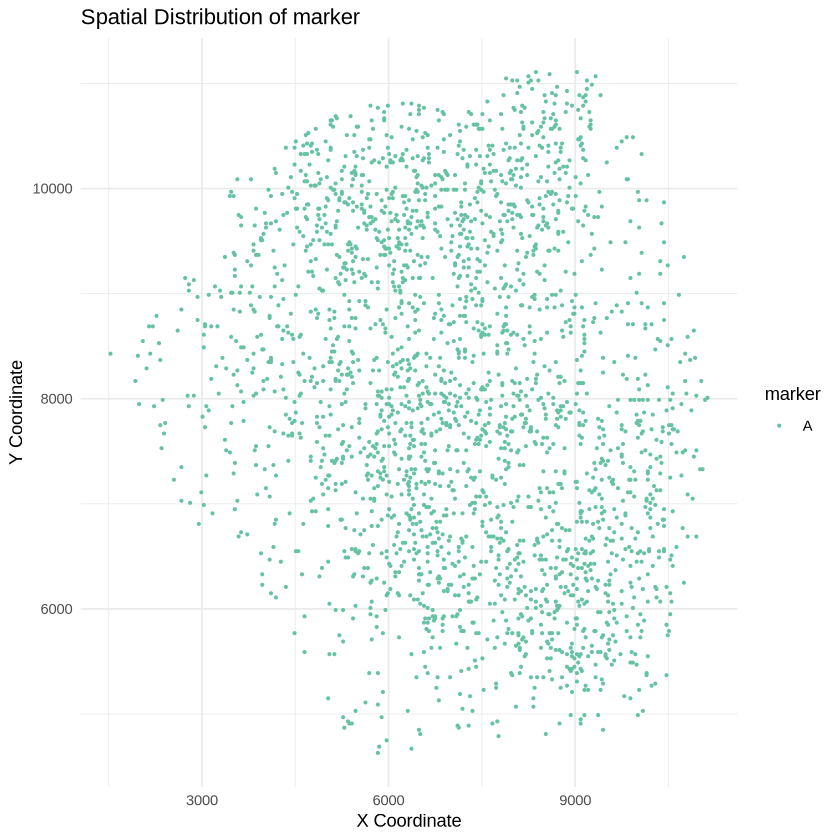

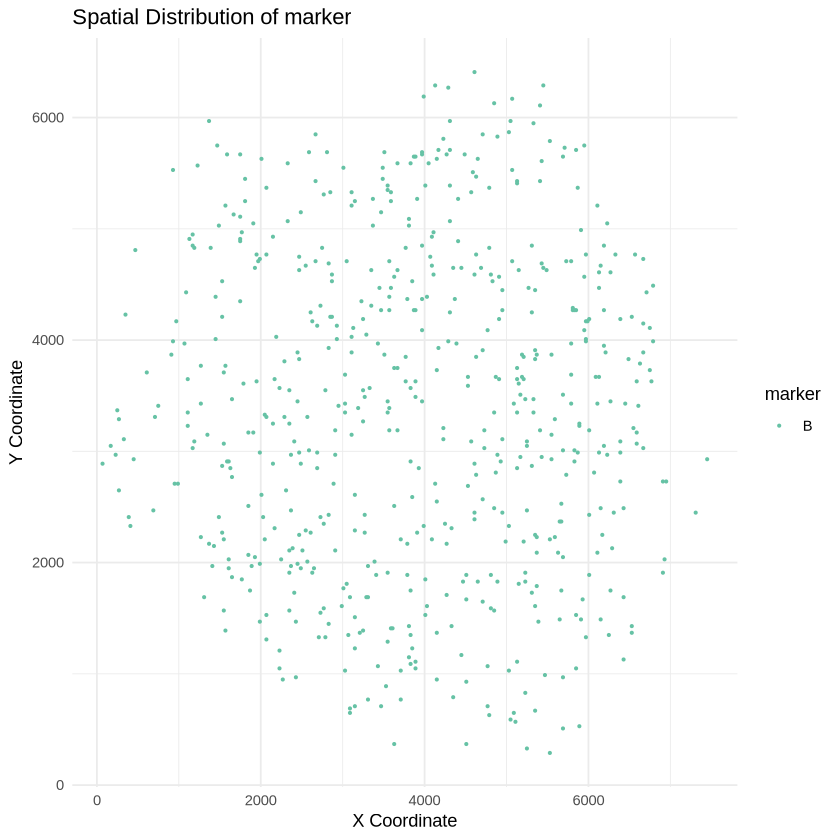

In [34]:
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

SpatialDimPlotCustom <- function(object, attribute, marker_value) {
  # print(object@meta.data)
  filtered_data <- subset(object, subset=marker==marker_value)
  # print(1)
  # print(filtered_data@meta.data)
  ggplot(filtered_data@meta.data, aes(x = coord_x, y = coord_y, color = .data[[attribute]])) +
    geom_point(size=0.5) +
    labs(title = paste("Spatial Distribution of", attribute),
         x = "X Coordinate",
         y = "Y Coordinate",
         color = attribute) +
    theme_minimal()+
    scale_color_manual(values=custom_colors)
}

SpatialDimPlotCustom(spatial_data, "marker", "A")
SpatialDimPlotCustom(spatial_data, "marker", "B")

In [35]:
spatial_data@images$Spatial <- new(
    Class="VisiumV1",
    assay="RNA",
    key="image_",
    coordinates=data.frame(
        imagerow = spatial_data@meta.data$coord_x,
        imagecol = spatial_data@meta.data$coord_y
    )%>%magrittr::set_rownames(rownames(spatial_data@meta.data)),
    scale.factors=scalefactors(spot = 138.656, fiducial = 223.9828, hires = 0.1139861, lowres = 0.03419583)
)

In [36]:
spatial_data <- RenameCells(spatial_data, new.names = make.names(Cells(spatial_data)))
# t_high_data <- RenameCells(t_high_data, new.names=make.names(Cells(t_high_data)))
cdata <- RenameCells(cdata, new.names=make.names(Cells(cdata)))

In [51]:
# genes_of_interest = c('Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g')
# spatial_data[["total_expression"]] <- colSums(spatial_data@assays$RNA@data[genes_of_interest, ])
# tdata <- subset(spatial_data, subset = total_expression > 0)
tdata <- subset(spatial_data, subset = marker == 'A')

In [38]:
# t_high_data@meta.data$type <- 'T'
cdata@meta.data$type <- 'T'

In [52]:
# spatial_data <- NormalizeData(spatial_data)
tdata <- NormalizeData(tdata)


In [54]:
# a_traint <- CellTrek::traint(st_data = a_data, sc_data = t_high_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'type', nfeatures = 2000)
traint <- CellTrek::traint(st_data = tdata, sc_data = cdata, sc_assay = "RNA", st_assay = "RNA", cell_names = 'type', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...



Using 2000 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 11536 anchors

Filtering anchors

	Retained 2677 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 2000 features onto reference data



Creating new Seurat object... 
Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 24 features requested have zero variance (running reduction without them): Myh4, Cyp4b1, Id4, Ankrd2, Aspa, Irx3, Ear2, Krt20, Myzap, Apod, Ppp1r27, Bmper, Snap25, Avpr1a, Mpp3, Casq2, Hoxa3, Thbs4, Atp13a4, Pcp4l1, Clec14a, Col6a4, Foxa2, Pcdhb19”
PC_ 1 
Positive:  Ccl5, Ly6c2, Malat1, Epsti1, Zfp36l2, Ctla2a, Fgl2, Hopx, S100a6, Cxcr3 
	   Ifngr1, Txnip, Tsc22d3, Ifi206, Slfn1, Ifi213, Gzma, Btg1, Ly6a, Itgb7 
	   Gzmk, Ifi208, Rtp4, Samhd1, Vim, Anxa1, Irf7, Trdc, Ifi47, Cxcr6 
Negative:  Tuba1b, Pclaf, Stmn1, Cks1b, Birc5, Ccna2, Spc24, Tubb5, Ptma, Hist1h2ae 
	   Cdk1, Top2a, Mki67, Cdca8, Rrm2, Tk1, Nusap1, Hist1h1b, Ran, Dut 
	   Smc2, Ube2c, Tnfrsf9, Kif11, Tpx2, Hist1h2ap, Tyms, Hnrnpab, Tubb4b, Irf8 
PC_ 2 
Positive:  Tnfrsf9, Junb, Itgav, Cd8a, Rgs16, Irf8, Gadd45b, Il21r, Ccr7, Lag3 
	   Nr4a3, Stat3, Rel, Nfkb1, Orai1, Nr4a2, Bhlhe40, Crtam,

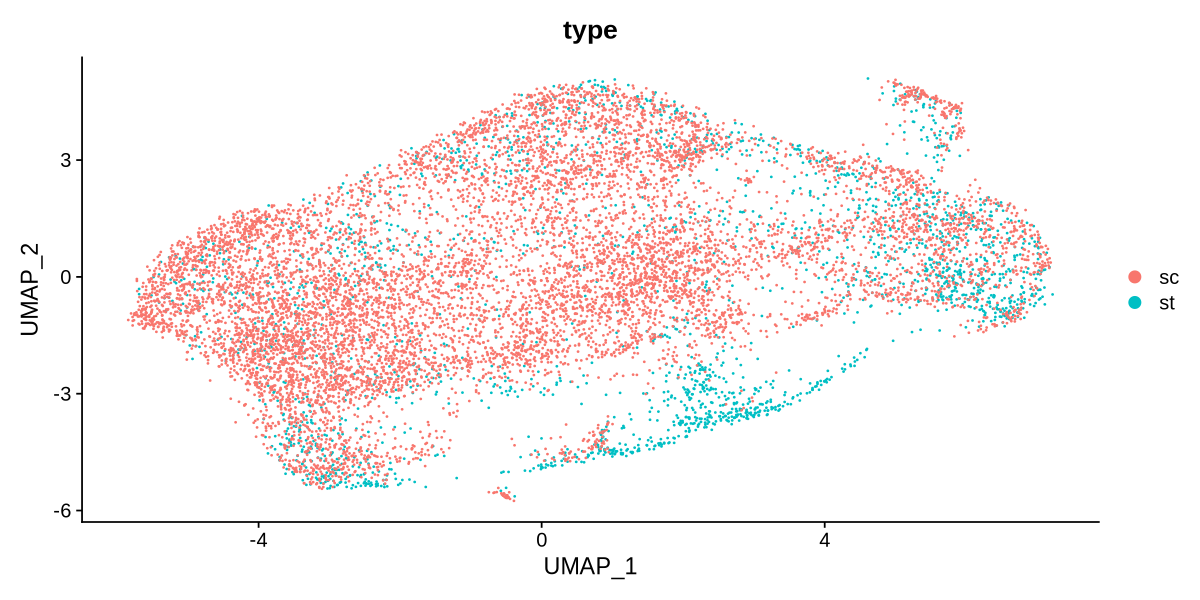

In [55]:
DimPlot(traint, group.by='type', raster=F)

In [56]:
celltrek <- CellTrek::celltrek(st_sc_int=traint, int_assay='traint', sc_data=cdata, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200, 
                                dist_thresh=0.55, top_spot=4, spot_n=10,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 120 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to celltrek_”


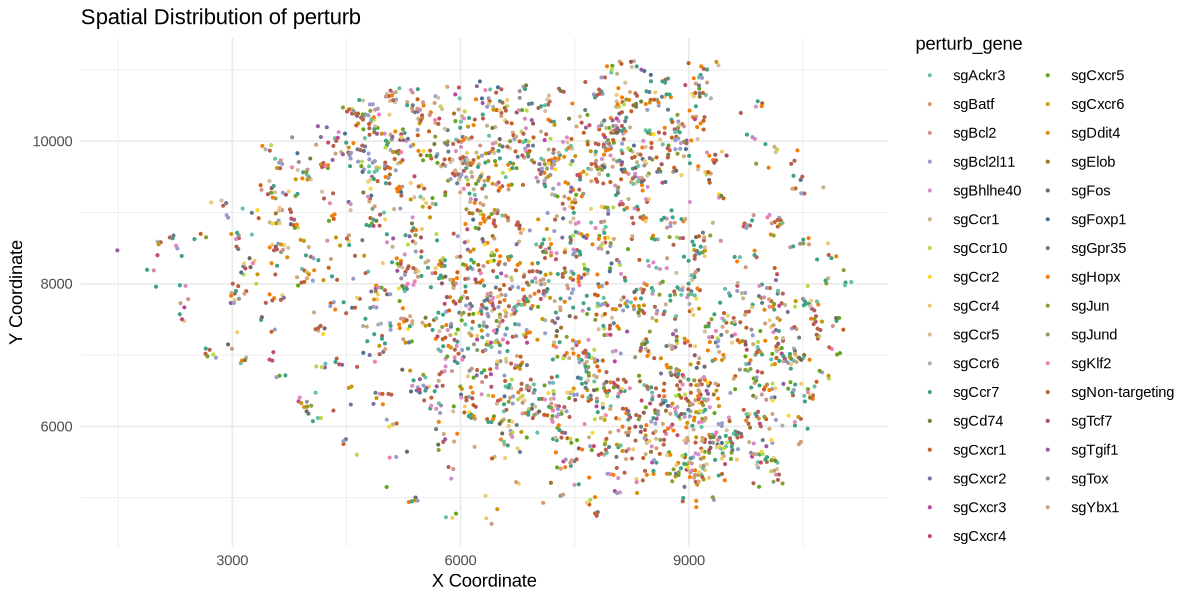

In [57]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(celltrek@meta.data %>% filter(perturb_gene != 'Duplicate'), aes(x = coord_x, y = coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [121]:
degs <- union(degs, VariableFeatures(cdata))
perturb_data <- subset(cdata, features = degs, subset = perturb_gene != 'Duplicate')

In [142]:
a_celltrek <- RenameCells(a_celltrek, new.names = make.names(Cells(a_celltrek)) %>% paste('st_', ., sep=''))
perturb_data <- RenameCells(perturb_data, new.names = make.names(Cells(perturb_data)))

In [143]:
a_second_traint <- CellTrek::traint(st_data = a_celltrek, sc_data = perturb_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'group', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”


Using 112 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 26052 anchors

Filtering anchors

	Retained 19679 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 112 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cd63, Vcam1, H2-Ab1, Cd74, H2-Aa, Fcgr4, Cd300a, Ifitm2, Sirpb1a, Rhoc 
	   Fcer1g, H2-M2, Myadm, Areg, Aqp3, Col6a2, Il1r2, Slc2a1, Tnfrsf4, Cd70 
	   H2-Eb2, Tnfsf9, Ccr7, Anxa1, Lrig1, Tnfsf4, Csf1, Ifitm1, Tnfrsf9, Crtam 
Negative:  Nkg7, Cd52, Hcst, Ltb, Klrd1, Klrc1, Ifngr1, Cxcr6, Itgb1, Cxcr3 
	   Gzmk, Ccr2, Ctla4, Tigit, Rgs1, Gzma, Prkch, Cd8b1, Itgb7, Il7r 
	   Cd69, Gpr183, Itm2b, Pdcd1, Il12rb2, Cd226, S1pr1, Emb, S100a6, Pag1 
PC_ 2 
Positive:  Tnfrsf9, Cd8a, Tnfrsf4, Lag3, Il21r, Ccr7, Cd70, Crtam, Tnfsf4, Tnfrsf18 
	   Il10ra, Pdcd1, Cd160, Eomes, Il2ra, Cd6, Cd8b1, Prf1, Tox, Havcr2 
	   Tigit, Cd5, Nkg7, Il1r2, Gpm6b, Slc2a3, Tnfsf14, Tnfsf9, Prkch, Gzme 
Negative:  Anxa1, Itm2b, Itgb7, Cxcr3, Gzmk, Gzma, S100a6, Ifngr1, Myadm, Cd63 
	   S1pr1, Klf2, Vcam1, Ifitm2, Ifitm1, Emb, Gpr183, Pag1, Bst2, Aqp3 
	   Hcst, Cxcr4, Itga1, Rgs1, Il7r, Ccr2, Cd226, Pmepa1, Fcgr4, Col6a2 
PC_ 3 
Positive:  Aqp3, Rhoc, Areg, Cd63,

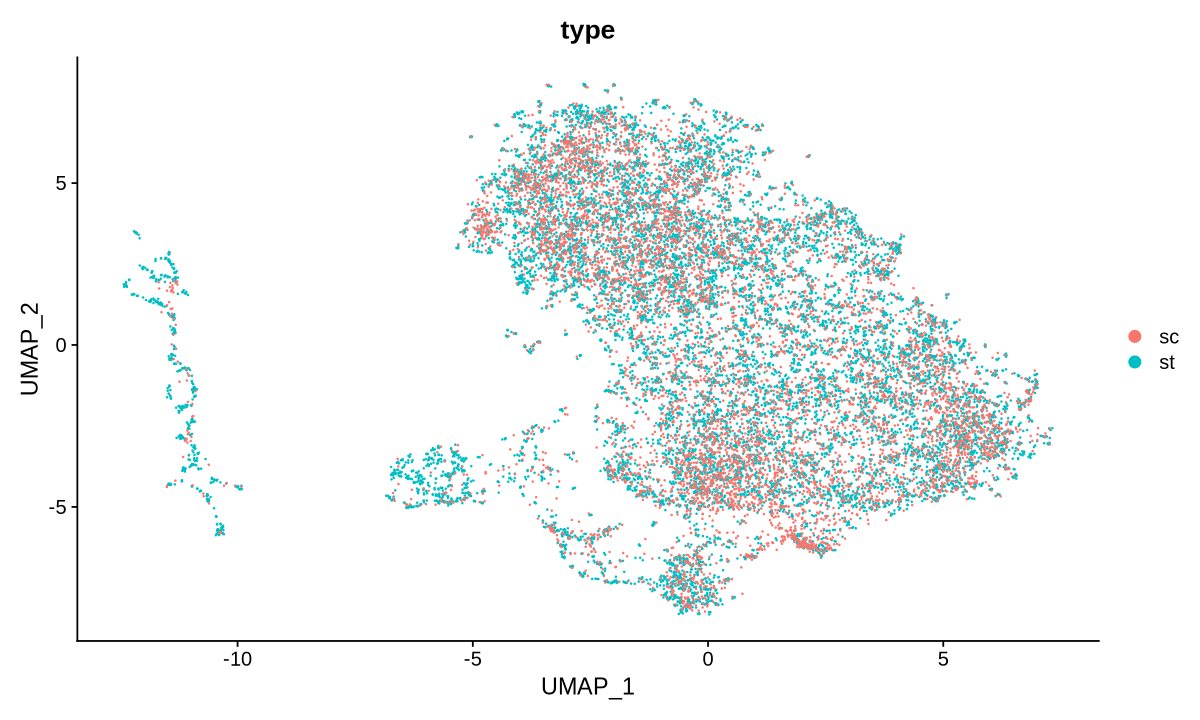

In [144]:
DimPlot(a_second_traint, group.by='type', raster=F)

In [152]:
a_second_celltrek <- CellTrek::celltrek(st_sc_int=a_second_traint, int_assay='traint', sc_data=perturb_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200,
                                dist_thresh=0.55, top_spot=4, spot_n=1,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 46 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”


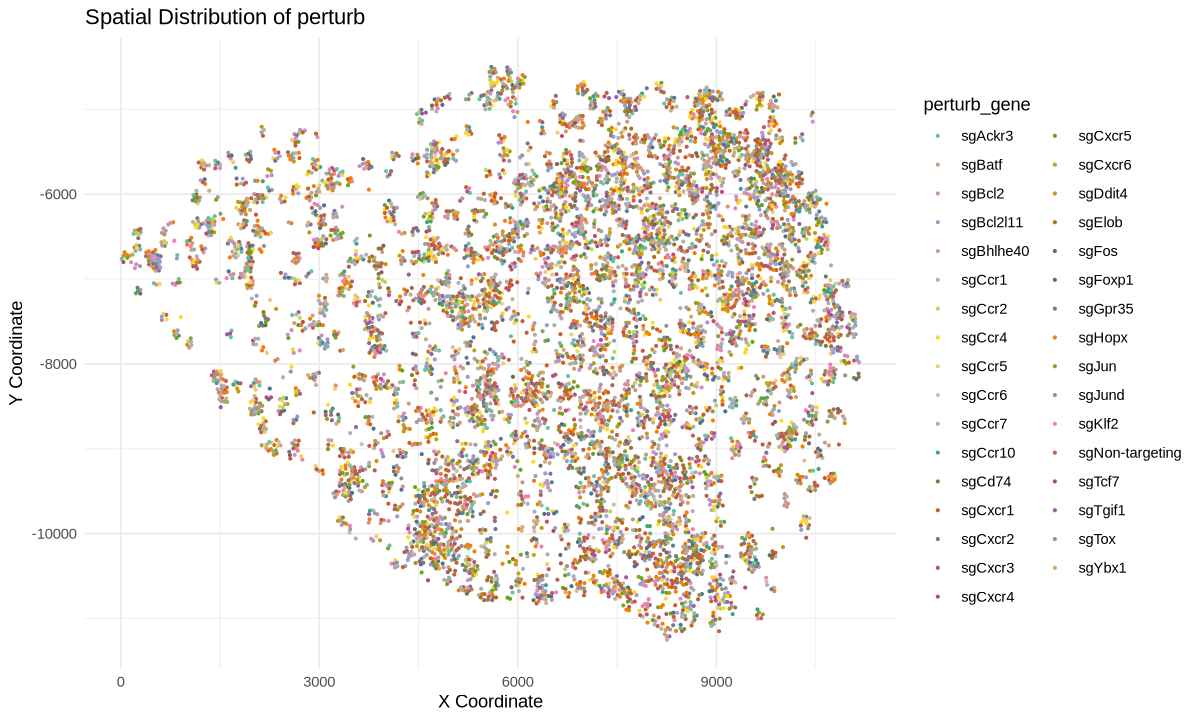

In [157]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot((a_second_celltrek)@meta.data, aes(x = coord_x, y = -coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [159]:
b_celltrek <- RenameCells(b_celltrek, new.names = make.names(Cells(b_celltrek)) %>% paste('st_', ., sep=''))
perturb_data <- RenameCells(perturb_data, new.names = make.names(Cells(perturb_data)))

In [160]:
b_second_traint <- CellTrek::traint(st_data = b_celltrek, sc_data = perturb_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'group', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”


Using 112 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 26528 anchors

Filtering anchors

	Retained 19996 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 112 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cxcr3, Gzmk, Ifngr1, Hcst, Gzma, Itm2b, Itgb7, S100a6, Cd52, S1pr1 
	   Anxa1, Gpr183, Ccr2, Itgb1, Rgs1, Cxcr6, Il7r, Emb, Klf2, Pag1 
	   Cd226, Klrd1, Klrc1, Itga1, Cd69, Ltb, Ifitm1, Cxcr4, Bst2, Cd40lg 
Negative:  Tnfrsf9, Tnfrsf4, Ccr7, Cd8a, Il21r, Cd70, Lag3, Crtam, Tnfsf4, Cd74 
	   Eomes, Il1r2, Il10ra, Tnfrsf18, Il2ra, Tox, Cd160, Cd6, Prf1, Tnfsf9 
	   Cd5, Pdcd1, Gpm6b, Havcr2, H2-Ab1, Cd8b1, Tnfsf14, Mpp7, H2-Aa, Gzme 
PC_ 2 
Positive:  Cd63, Vcam1, H2-Aa, Ifitm2, H2-Ab1, Fcgr4, Cd300a, Sirpb1a, Myadm, Fcer1g 
	   Cd74, Aqp3, Rhoc, H2-M2, Areg, Anxa1, Col6a2, H2-Eb2, Ifitm1, Slc2a1 
	   Bst2, Pmepa1, Il1r2, Cxcr4, Lrig1, Klf2, Csf1, S100a6, Adrb2, Pag1 
Negative:  Nkg7, Cd52, Ltb, Klrd1, Klrc1, Hcst, Tigit, Cd8b1, Cd8a, Lag3 
	   Pdcd1, Cxcr6, Prkch, Tnfrsf18, Ctla4, Il21r, Tnfrsf9, Itgb1, Havcr2, Cd160 
	   Ifngr1, Cd6, Cd5, Il10ra, Tox, Il12rb2, Prf1, Il2ra, Slc2a3, Ccr2 
PC_ 3 
Positive:  Aqp3, Rhoc, Cd63, Areg, Anxa

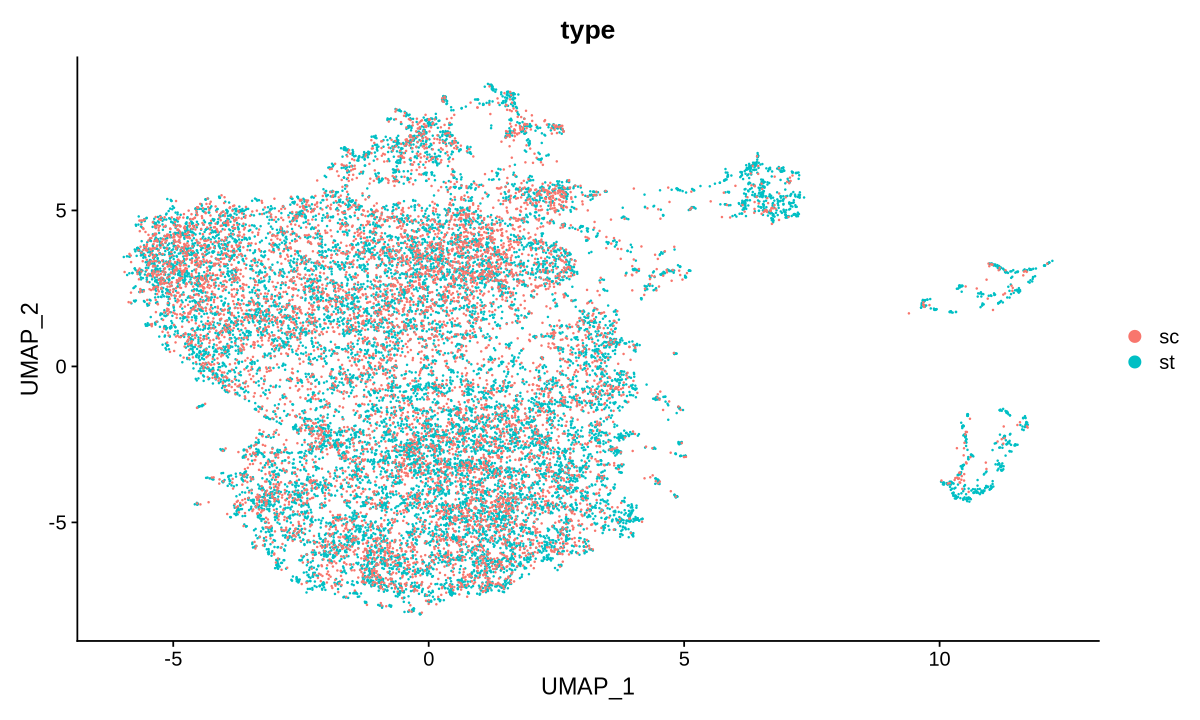

In [161]:
DimPlot(b_second_traint, group.by='type', raster=F)

In [162]:
b_second_celltrek <- CellTrek::celltrek(st_sc_int=b_second_traint, int_assay='traint', sc_data=perturb_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200,
                                dist_thresh=0.55, top_spot=4, spot_n=1,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 42 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”


In [167]:
a_second_celltrek

An object of class Seurat 
2029 features across 7409 samples within 1 assay 
Active assay: RNA (2029 features, 0 variable features)
 1 layer present: data
 2 dimensional reductions calculated: celltrek, celltrek_raw
 1 image present: Spatial

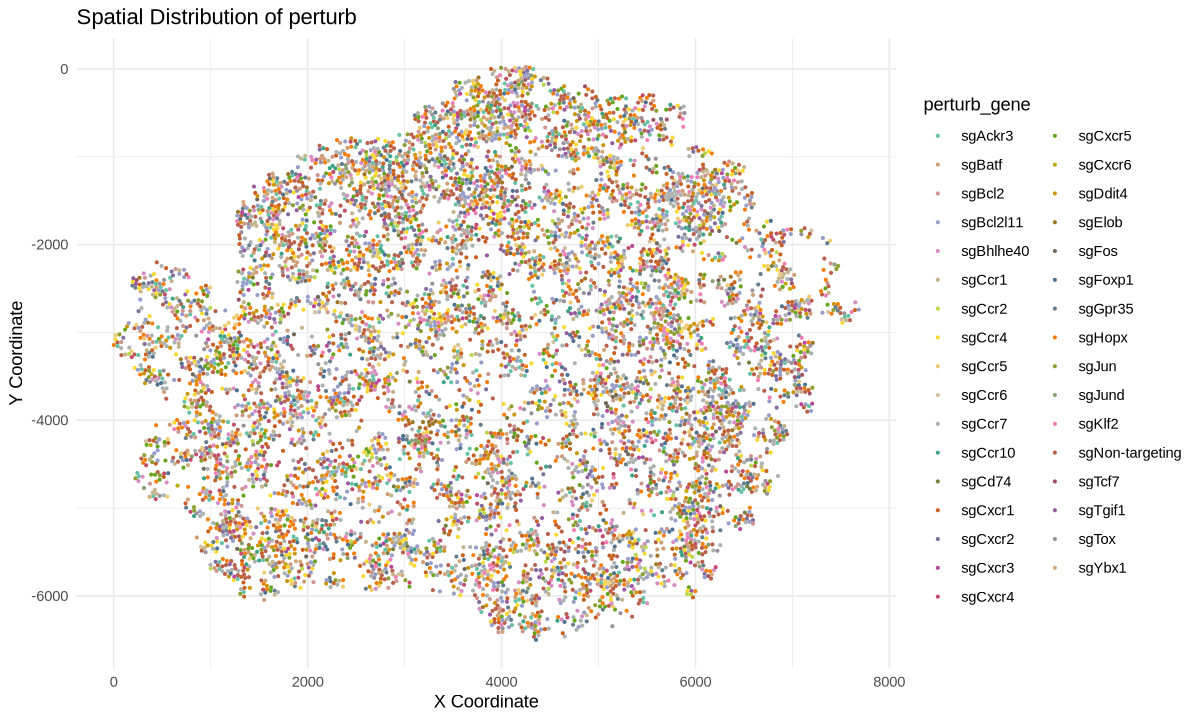

In [163]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot((b_second_celltrek)@meta.data, aes(x = coord_x, y = -coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [49]:
celltrek@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,⋯,perturb,perturb_gene,leiden,phenotype,group,type,id_raw,id_new,coord_x,coord_y
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
CACAGTAAGGAGTTGC.1,SeuratProject,1274.1197,1377,1380,7.230563,3634,8.198364,33.37920,43.58833,55.58613,⋯,Duplicate,Duplicate,2,Teff,Duplicate,T,CACAGTAAGGAGTTGC.1,CACAGTAAGGAGTTGC.1,8622.033,5941.853
TACGGTACATTGGCGC.1,SeuratProject,1246.2258,1452,1456,7.284135,4419,8.393895,35.91310,46.68477,58.38425,⋯,Duplicate,Duplicate,2,Teff,Duplicate,T,TACGGTACATTGGCGC.1,TACGGTACATTGGCGC.1,8522.878,5907.796
ACTTTCACAGTGAGTG.1,SeuratProject,1304.2273,1340,1341,7.201916,3167,8.060856,30.21787,40.25892,52.66814,⋯,sgNon-targeting_2,sgNon-targeting,2,Teff,sgNon-targeting,T,ACTTTCACAGTGAGTG.1,ACTTTCACAGTGAGTG.1,8556.536,5978.666
GGACGTCTCCGCTGTT.1,SeuratProject,1316.5194,1611,1614,7.387090,4698,8.455105,32.82248,42.99702,55.12984,⋯,Duplicate,Duplicate,2,Teff,Duplicate,T,GGACGTCTCCGCTGTT.1,GGACGTCTCCGCTGTT.1,8571.687,5911.117
GCATGATCAGCTCGCA.1,SeuratProject,1228.6698,1098,1100,7.003974,2402,7.784473,30.68276,40.63281,53.91341,⋯,Duplicate,Duplicate,8,Tpex,Duplicate,T,GCATGATCAGCTCGCA.1,GCATGATCAGCTCGCA.1,5964.079,6134.453
CACAGGCCATTACGAC.1,SeuratProject,1039.5717,893,893,6.795706,2416,7.790282,41.34934,53.93212,66.76325,⋯,Duplicate,Duplicate,0,Tex,Duplicate,T,CACAGGCCATTACGAC.1,CACAGGCCATTACGAC.1,5892.685,6240.377
CAGCAGCCAAGTACCT.1,SeuratProject,995.8614,976,978,6.886532,3378,8.125335,46.95086,58.85139,70.69272,⋯,Duplicate,Duplicate,0,Tex,Duplicate,T,CAGCAGCCAAGTACCT.1,CAGCAGCCAAGTACCT.1,5953.309,6250.964
CATCAAGTCTGTCTCG.1,SeuratProject,1020.6238,733,735,6.601230,1589,7.371490,37.88546,50.59786,64.94651,⋯,Duplicate,Duplicate,0,Tex,Duplicate,T,CATCAAGTCTGTCTCG.1,CATCAAGTCTGTCTCG.1,5918.609,6270.837
AAGACCTAGGCTACGA.1,SeuratProject,1525.6332,2860,2863,7.959975,11303,9.332911,27.93949,37.42369,48.50925,⋯,Duplicate,Duplicate,6,Teff,Duplicate,T,AAGACCTAGGCTACGA.1,AAGACCTAGGCTACGA.1,9731.992,6495.681


In [58]:
c_tab <- celltrek@meta.data %>% dplyr::select(c('coord_x', 'coord_y', 'perturb', 'perturb_gene', 'phenotype'))
write.table(c_tab, '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.double.t_map.csv', sep='\t', quote=FALSE)

# c_tab <- b_second_celltrek@meta.data %>% dplyr::select(c('coord_x', 'coord_y', 'perturb', 'perturb_gene'))
# write.table(c_tab, '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.double.t_map.B.csv', sep='\t', quote=FALSE)